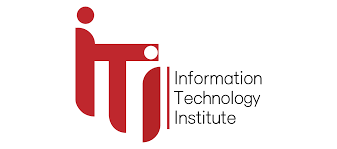

## List of Team Members:
1. **Mohamed Said Abdel Aziz**
2. **Mohamed Ahmed Mohamed**
3. **Kareem Mohamed Emad**
4. **Eslam Mohamed Hafez**

# **DataSet:**
https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/data

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **About DataSet:**

This dataset provides Amazon e-commerce sales data, including:
- **Order ID**: Unique identifier for each order. (integer number)
- **Date**: Order date. (string)
- **Status**: Status of the sale. (string)
- **Sales Channel**: Platform where the sale occured. (string)
- **ship-service-level**: The shiping option selected for the order. (string)
- **Style**: Product style. (string)
- **SKU**: Stock keeping unit. (string)
- **Category**: Product category. (string)
- **Order ID**: Unique identifier for each order. (string)
- **Size**: Product size. (string)
- **ASIN**: Amazon standard identification number. (string)
- **Courier Status**: The current delivery status of the order. (string)
- **Qty**: Quantity of the Product. (integer number)
- **currency**: Product currency. (string)
- **Amount**: Product sales. (float number)
- **ship-city**: Shipping city destination. (string)
- **ship-state**: Shipping state destination. (string)
- **ship-postal-code**: ship postal code. (float number)
- **ship-country**: Shipping country destination. (string)
- **promotion-ids**: Identifier for the product promotion. (string)
- **B2B**: Business to business sale. (boolean)
- **fulfilled-by**: Method of fulfilment. (string)

# **Objective**

The objective of this notebook is to analyze sales data to identify key trends, increase revenue and performance.

# **Analysis Summary**  

### **Key Sales Insights:**  
- **Bengaluru leads in total sales (75,346.3),** followed by Hyderabad, while Chennai records the lowest sales.  
- **Maharashtra (146,681) and Karnataka (115,292) dominate state-wise sales,** while Tamil Nadu records the lowest.  
- The sales concentration suggests a stronger market presence in **Bengaluru, Maharashtra, and Karnataka.**  

### **Order Fulfillment Performance:**  
- **Shipped orders account for 84.89% (109,484),** demonstrating strong fulfillment efficiency.  
- **Unshipped (5.18%), Unknown (5.33%), and Cancelled (4.60%) orders** should be analyzed to minimize inefficiencies.  
- **Amazon fulfills 70% of total orders,** highlighting its dominant role over Merchant fulfillment (30%).  

### **Product Category Performance:**  
- **"Set" is the top-selling category (50.35% of total sales),** followed by **Kurta (27.36%)** and **Western Dress (14.41%).**  
- **Top (6.87%) and Ethnic Dress (1.02%)** have niche demand, requiring strategic inventory planning.  

### **Sales Trends:**  
- **April 2022 saw the highest sales (317,226),** but subsequent months (May & June) showed a declining trend.  
- The **sharp rise in April** suggests a promotional boost or seasonal effect, requiring further investigation.  

### **Recommendations:**  
- **Optimize Merchant fulfillment efficiency** to balance reliance on Amazon’s network.  
- **Investigate unshipped and unknown orders** to improve order processing.  
- **Prioritize high-performing categories (Set & Kurta)** for inventory and marketing efforts.  
- **Analyze the drivers behind April’s sales spike** to implement sustainable growth strategies.

# **Machine Learning Model Summary**  

### **Feature Correlation Analysis:**  
- **Pearson correlation** was used to measure the relationship between numerical features and the target variable (**ship_status**).  
- A **correlation heatmap** was generated to visualize feature relationships.  
- **Cramér’s V** was applied to assess associations between categorical features and **ship_status**, categorizing relationships as weak, moderate, strong, or very strong.  

### **Feature Selection & Encoding:**  
- **Key features selected** include **order_quantity, fulfilment, service_level, courier_ship_status, promotion, and ship_status**.  
- **Label encoding** was applied to categorical variables for model compatibility.  
- The processed dataset was saved for further analysis.  

### **Model Training & Evaluation:**  
- **Random Forest Classifier** was selected for its ability to handle both categorical and numerical data while reducing overfitting.  
- **Dataset split (80% training, 20% testing)** was performed.  
- **Model accuracy achieved: 97.37**.  
- **Classification report generated** to assess model performance across different classes.  

# **Data Exploring**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/drive/MyDrive/Amazon Sale Report.csv")
df.head()

<ipython-input-4-25642471dedf>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# **Data Cleaning**

## **Cleaning Data from Non Usable Columns**

In [ ]:
df['currency'].value_counts()

,count
currency,
INR,121180


In [ ]:
df['ship-country'].value_counts()

,count
ship-country,
IN,128942


In [ ]:
df['Sales Channel '].value_counts()

,count
Sales Channel,
Amazon.in,128851
Non-Amazon,124


In [ ]:
# Checking the percentage of null values in 'fulfilled-by' column
df['fulfilled-by'].isnull().sum() / len(df) * 100

69.54681139755766

In [ ]:
#Droping Columns
df.drop(columns = ['Unnamed: 22', 'index', 'currency' ,'fulfilled-by', 'ship-country','Sales Channel '], inplace = True)

In [ ]:
df.sample(5)

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
73515,408-6662800-3077953,05-12-22,Shipped,Amazon,Expedited,NW034,NW034-TP-PJ-XXL,Set,XXL,B09M768N86,Shipped,1,613.0,NEW DELHI,DELHI,110019.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
89163,408-2699724-4281954,05-02-22,Cancelled,Amazon,Expedited,SET058,SET058-KR-NP-M,Set,M,B07R65WLT2,Cancelled,0,NaN,SAWAI MADHOPUR,RAJASTHAN,322021.0,NaN,False
4121,407-0224782-9594778,04-28-22,Shipped,Amazon,Expedited,SAR135,SAR135,Saree,Free,B09NDCQM14,Shipped,1,632.0,BENGALURU,KARNATAKA,560094.0,NaN,False
55280,402-8730023-7979551,05-27-22,Shipped,Amazon,Expedited,JNE3735,JNE3735-KR-M,kurta,M,B09LV1BBHX,Shipped,1,386.0,NEW DELHI,Delhi,110019.0,NaN,False
33379,404-3477291-9471565,04-10-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-M,kurta,M,B07WP5HRMB,Shipped,1,329.0,Koothparamba,KERALA,670612.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


## **Dealing with duplicates**

In [ ]:
# Displaying duplicate values if found
df[df.duplicated(keep = False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
86418,405-8669298-3850736,05-03-22,Shipped,Amazon,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,B08YYQS8FH,Shipped,1,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,B08YYQS8FH,Shipped,1,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [ ]:
# Dropping dublicates
df.drop_duplicates(inplace = True, ignore_index = True)

In [ ]:
# Checking for duplicate
df.duplicated().sum()

0

## **Dealing with null values**

In [ ]:
# Checking the null values percentages
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

,0
promotion-ids,38.109933
Amount,6.041762
Courier Status,5.328412
ship-postal-code,0.025588
ship-state,0.025588
ship-city,0.025588
Order ID,0.000000
Date,0.000000
Qty,0.000000
ASIN,0.000000


There are null values in columns: ['promotion-ids', 'Courier Status', 'ship-postal-code', 'ship-state', 'ship-city'] that must be dealt with.

In [ ]:
# Filling promotion-ids null values
df['promotion-ids'].fillna("No Promotions", inplace = True)

In [ ]:
# Filling Courier Status null values
df['Courier Status'].fillna("Unkown", inplace = True)

In [ ]:
# Filling shipping destinations null values
df['ship-postal-code'].fillna("Unkown", inplace = True)
df['ship-state'].fillna("Unkown", inplace = True)
df['ship-city'].fillna("Unkown", inplace = True)

There are null values in the 'Amount' column. Before filling them, I will first check the mode of the 'Status' column to determine an appropriate value for imputation.

In [ ]:
df[df['Amount'].isnull()]['Status'].value_counts()

,count
Status,
Cancelled,7563
Shipped,208
Shipped - Delivered to Buyer,8
Shipping,8
Shipped - Returned to Seller,3
Pending,2


Since the majority of orders status were canceled, I will fill the missing values in the 'Amount' column with zero.

In [ ]:
# Filling shipping destinations null values
df['Amount'].fillna(0, inplace = True)


In [ ]:
# Checking the null values percentages
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

,0
Order ID,0.0
Date,0.0
promotion-ids,0.0
ship-postal-code,0.0
ship-state,0.0
ship-city,0.0
Amount,0.0
Qty,0.0
Courier Status,0.0
ASIN,0.0


## **Dealing with columns naming conventions**

In [ ]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids', 'B2B'],
      dtype='object')

In [ ]:
# Standardizing column names for consistency and readability
mapper = {"Order ID": "order_ID", "Date": "date", "Status": "ship_status", "Fulfilment": "fulfilment", "ship-service-level": "service_level", "Style": "product_style",
          "SKU": "sku", "Category": "product_category", "Size": "product_size", "ASIN": "asin", "Courier Status": "courier_ship_status", "Qty": "order_quantity",
          "Amount": "sales_amount_usd", "ship-city": "city", "ship-state": "state", "ship-postal-code": "postal_code", "promotion-ids": "promotion", "B2B": "customer_type"}

# Mapping original column names to more structured and descriptive names
df.rename(columns = mapper, inplace = True)

## **Converting sales amount from INR to USD.**

In [ ]:
# Convert INR to USD using an exchange rate of 1 INR = 0.011 USD
exchange_rate = 0.011
df["sales_amount_usd"] = df["sales_amount_usd"].apply(lambda x: x * exchange_rate)

In [ ]:
df.sample(5)

,order_ID,date,ship_status,fulfilment,service_level,product_style,sku,product_category,product_size,asin,courier_ship_status,order_quantity,sales_amount_usd,city,state,postal_code,promotion,customer_type
128802,408-4182027-2307535,06-01-22,Cancelled,Merchant,Standard,JNE3619,JNE3619-KR-S,kurta,S,B091Q8JXX9,Unkown,0,0.000,BENGALURU,KARNATAKA,560092.0,No Promotions,False
109491,403-4299538-4247550,06-14-22,Shipped,Amazon,Expedited,SET290,SET290-KR-DPT-M,Set,M,B09B5922WD,Shipped,1,8.712,KARUR,TAMIL NADU,639006.0,No Promotions,False
125545,405-0263089-8018742,06-03-22,Shipped,Amazon,Expedited,J0248,J0248-KR-DPT-XXL,Set,XXL,B09RKFB4BJ,Shipped,1,9.394,BHIMADOLE,ANDHRA PRADESH,534425.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
31494,404-8638286-5100333,04-11-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3797,JNE3797-KR-XS,Western Dress,XS,B09SDY9SQ6,Shipped,1,7.975,KADUNGALLOOR,KERALA,683511.0,Amazon PLCC Free-Financing Universal Merchant ...,False
52119,402-7707771-7218708,05-29-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3800,JNE3800-KR-XXXL,Western Dress,3XL,B09SDZ64HF,Shipped,1,8.481,MUMBAI,MAHARASHTRA,400053.0,Amazon PLCC Free-Financing Universal Merchant ...,False


## **Dealing with 'B2B' column**

In [ ]:
# Converting boolean values in 'B2B' column to 'Business' and 'Customer' for better readability
df['customer_type'].replace(to_replace = [True, False], value = ['Business', 'Customer'], inplace = True)

## **Changing  Date datatype**

In [ ]:
# Changing date datatype
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128969 entries, 0 to 128968
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_ID             128969 non-null  object        
 1   date                 128969 non-null  datetime64[ns]
 2   ship_status          128969 non-null  object        
 3   fulfilment           128969 non-null  object        
 4   service_level        128969 non-null  object        
 5   product_style        128969 non-null  object        
 6   sku                  128969 non-null  object        
 7   product_category     128969 non-null  object        
 8   product_size         128969 non-null  object        
 9   asin                 128969 non-null  object        
 10  courier_ship_status  128969 non-null  object        
 11  order_quantity       128969 non-null  int64         
 12  sales_amount_usd     128969 non-null  float64       
 13  city          

# **Data Visualization**

## 1. What are the top 5 cities according to sales?

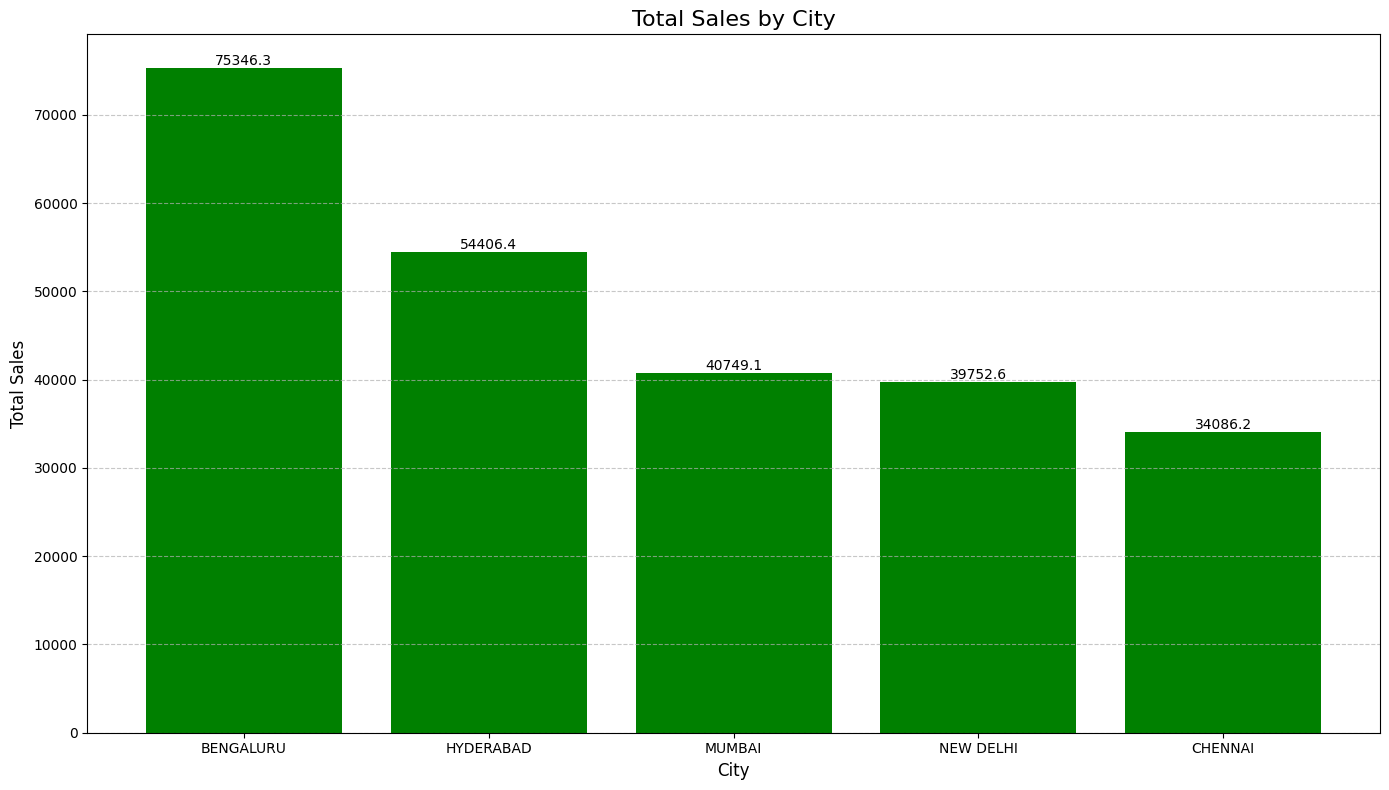

In [ ]:
# Calculate the total sales amount by city
total_sales_by_city = df.groupby('city')['sales_amount_usd'].sum().sort_values(ascending=False)

#Top 5 cities
top_5_cities = total_sales_by_city.head(5)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_5_cities.index, top_5_cities, color = "green")

# Adding data labels
ax.bar_label(bars)

# Adding title and labels
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Adjust x-axis labels
plt.xticks(rotation=0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## 2. What are the top 5 states according to sales?

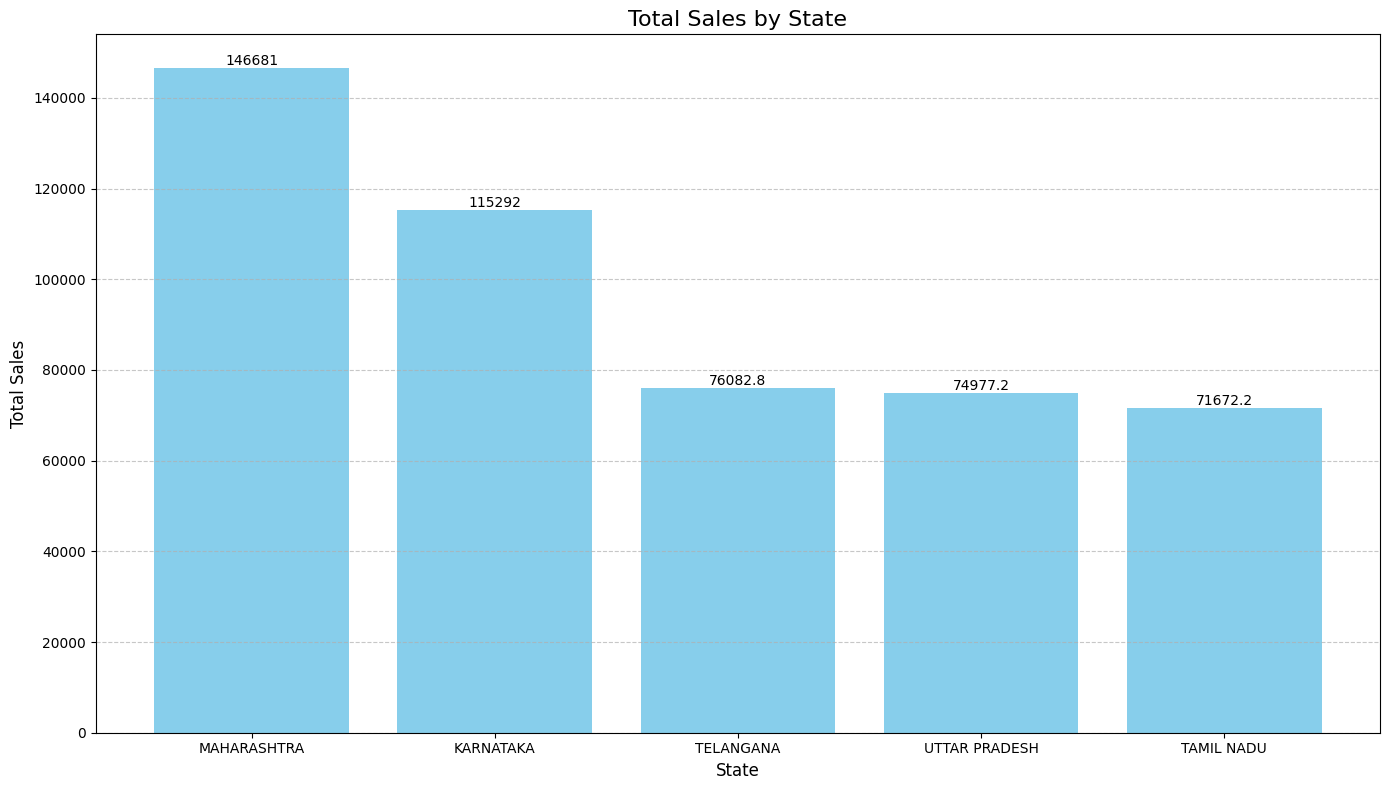

In [ ]:
# Calculate the total sales amount by state
total_sales_by_state = df.groupby('state')['sales_amount_usd'].sum().sort_values(ascending=False)

#Top 5 states
top_5_states = total_sales_by_state.head(5)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_5_states.index, top_5_states, color = "skyblue")

# Adding title and labels
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Adding data labels
ax.bar_label(bars)

# Adjust x-axis labels
plt.xticks(rotation=0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## 3. How many shipped orders compared to other status?

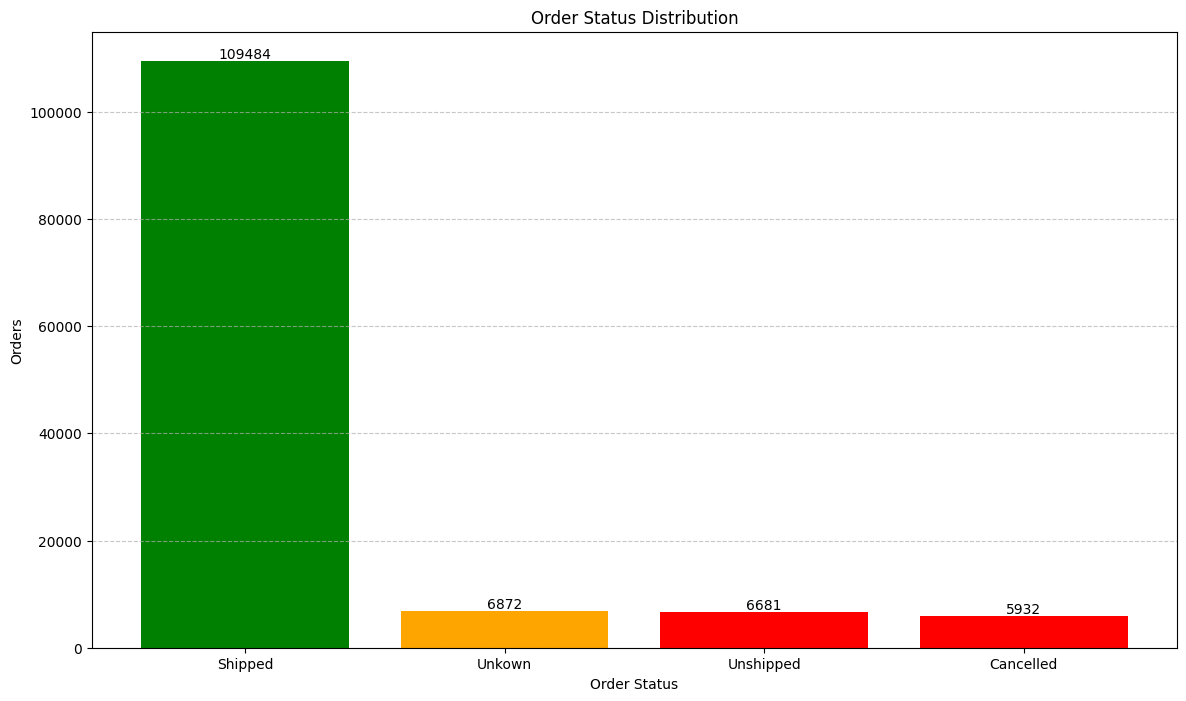

In [ ]:
# Count the occurences of each unique value in 'courier_ship_status' column
order_status_counts = df['courier_ship_status'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(order_status_counts.index, order_status_counts, color = ["green", "orange", "red", "red"])

# Adding title and labels
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Orders')

# Adding data labels
ax.bar_label(bars)

# Adjust x-axis labels
plt.xticks(rotation=0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## 4. Percentage of Shipped Orders compared to others.

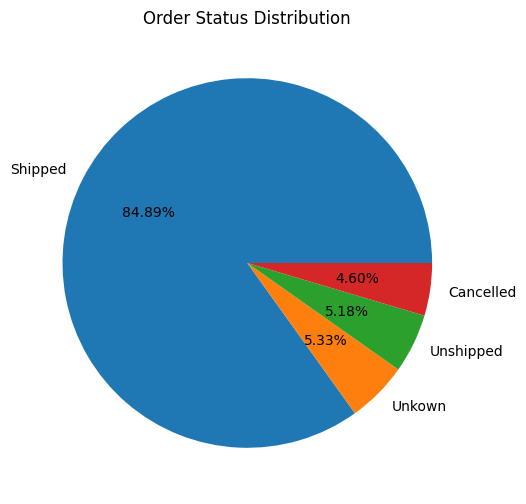

In [ ]:
# Count the occurences of each unique value in 'courier_ship_status' column
status_counts = df['courier_ship_status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct="%1.2f%%", color=['green','orange','red','blue'])

# Adding title and labels
plt.title('Order Status Distribution')
plt.ylabel('')

# Display the plot
plt.show()

## 5. Categories sales distribution.

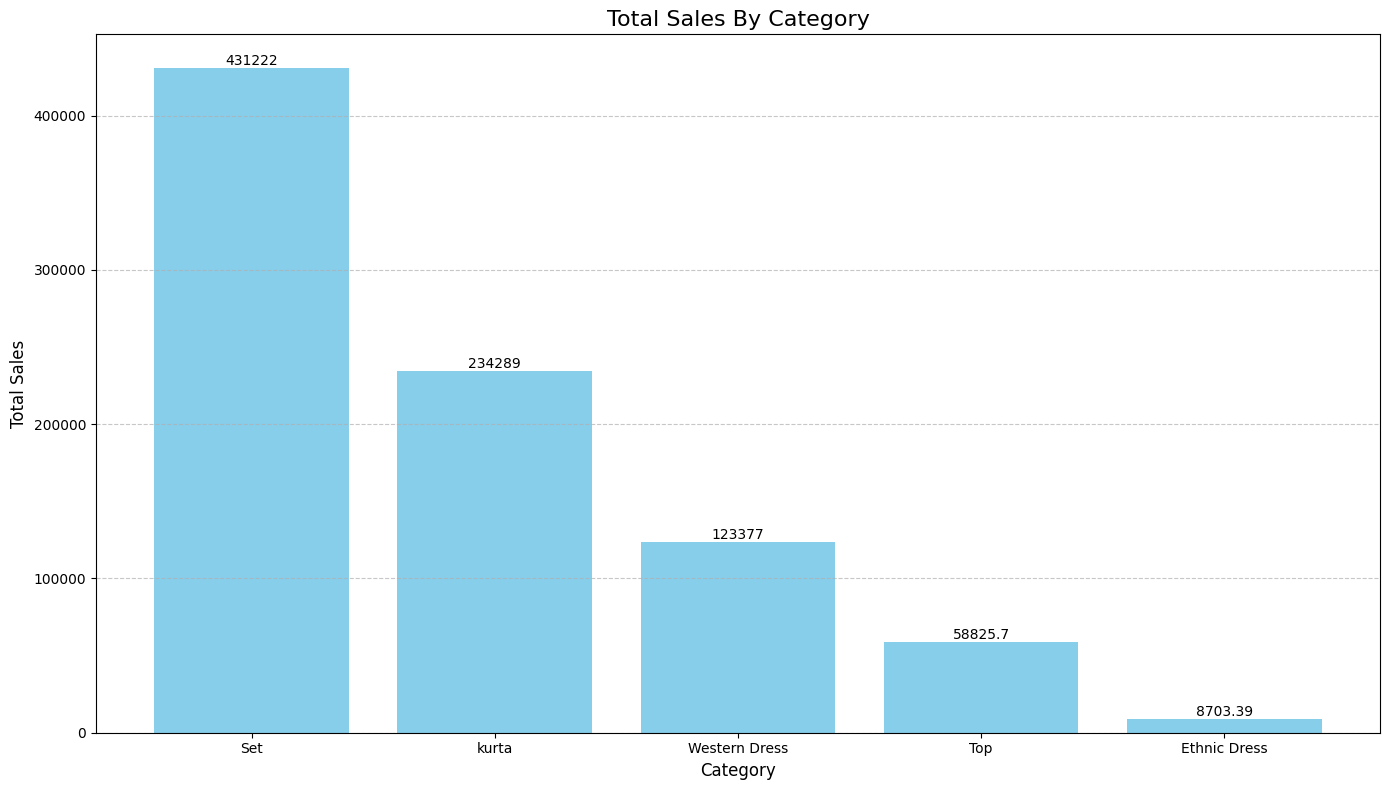

In [ ]:
# Calculate the total sales amount by city
Top_Trending_product = df.groupby('product_category')['sales_amount_usd'].sum().sort_values(ascending=False).head(5)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(Top_Trending_product.index, Top_Trending_product, color = "skyblue")

# Adding title and labels
plt.title('Total Sales By Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Adding data labels
ax.bar_label(bars)

# Adjust x-axis labels
plt.xticks(rotation=0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## 6. Categories sales percentages.

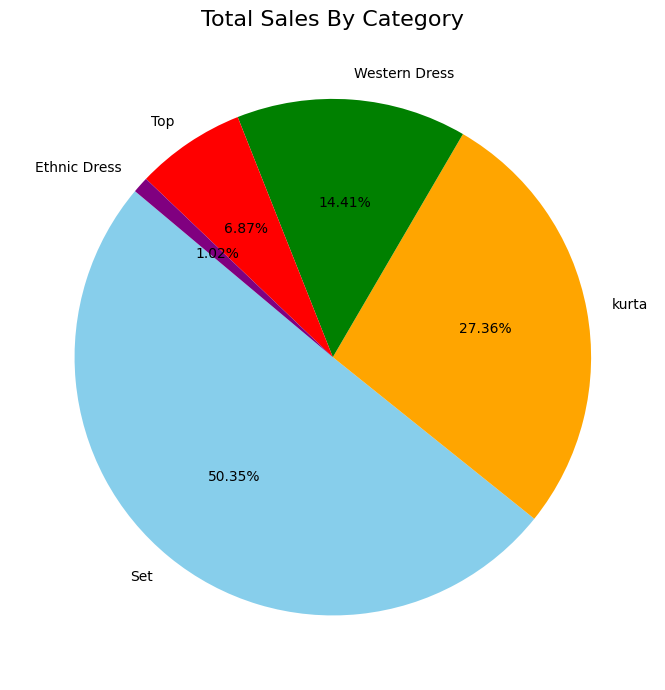

In [ ]:
# Calculate the total sales amount by category
Top_Trending_product = df.groupby('product_category')['sales_amount_usd'].sum().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 7))
Top_Trending_product.plot(kind='pie', autopct='%1.2f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Total Sales By Category', fontsize=16)
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()

## 7. How many orders fullfilled by amazon compared to other?

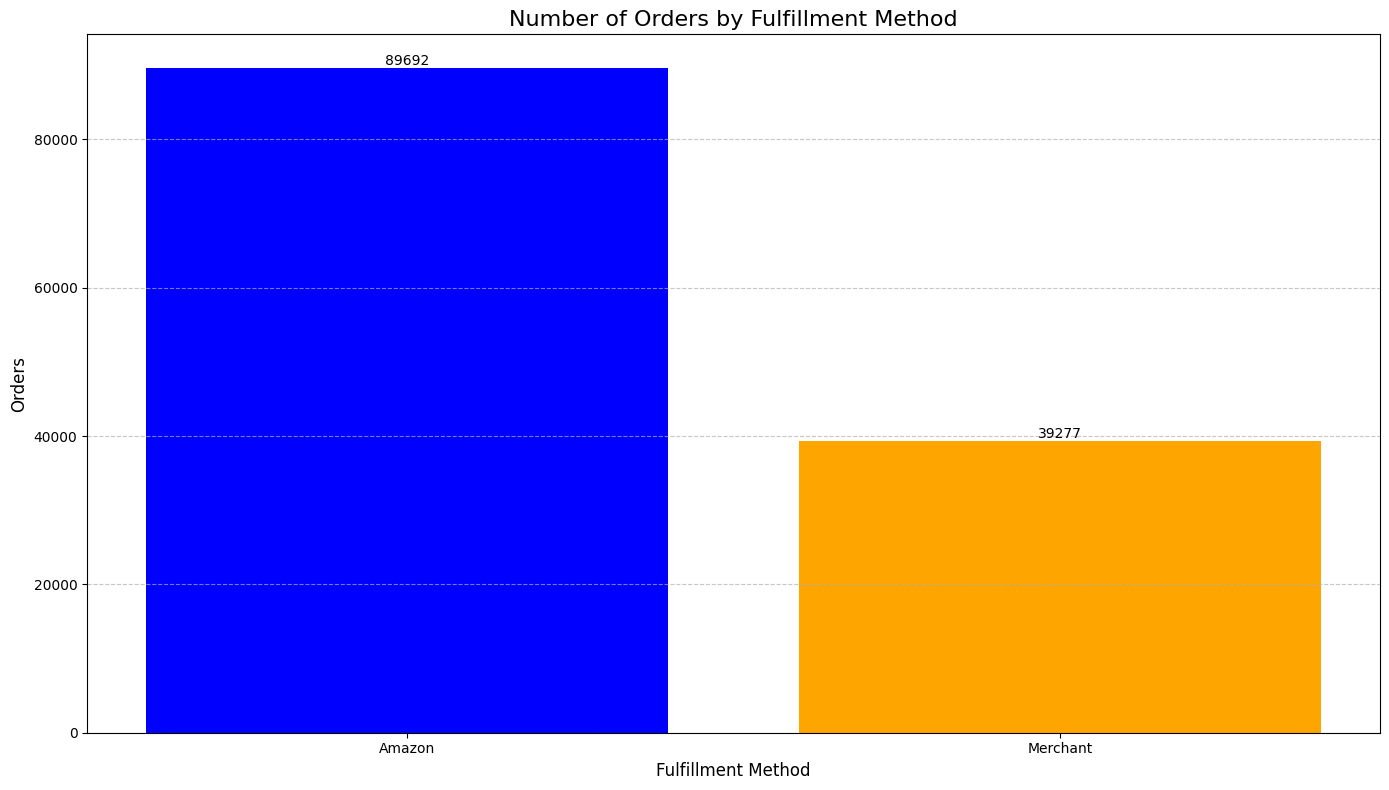

In [ ]:
# Count the occurences of each unique value in 'fulfilment' column
fulfillment_counts = df['fulfilment'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(fulfillment_counts.index, fulfillment_counts, color = ["blue", "orange"])

# Adding title and labels
plt.title('Number of Orders by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Orders', fontsize=12)

# Adding data labels
ax.bar_label(bars)

# Adjust x-axis labels
plt.xticks(rotation=0)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## 8. Monthly Sales Trends

<ipython-input-37-331a475e6942>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='date')['sales_amount_usd'].sum()


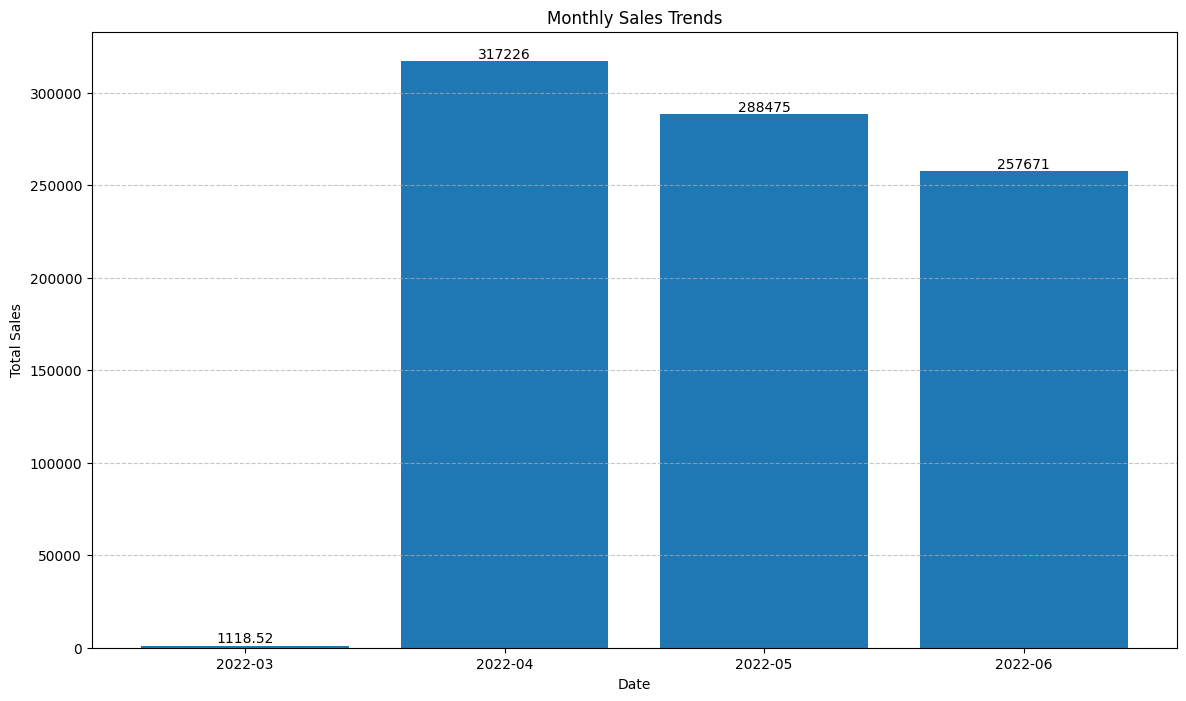

In [ ]:
# Calculate monthly sales
monthly_sales = df.resample('M', on='date')['sales_amount_usd'].sum()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(monthly_sales.index.strftime("%Y-%m"), monthly_sales)

# Adding title and labels
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Adding data labels
ax.bar_label(bars)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# **Machine Learning Model**

## Using Pearson correlation to check the correlation between numerical features and the target label

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical 'ship_status' column into numeric values
df["ship_status_encoded"] = label_encoder.fit_transform(df["ship_status"])

# Select only numerical features (integer and float columns) from the dataset
numeric_features = df.select_dtypes(include=["int64", "float64"]).copy()

# Compute the correlation of each numeric feature with the encoded 'ship_status'
correlation_matrix = numeric_features.corrwith(df["ship_status_encoded"]).sort_values(ascending=False)

# Print the correlation values
print(correlation_matrix)

ship_status_encoded    1.000000
order_quantity         0.560797
sales_amount_usd       0.221123
dtype: float64


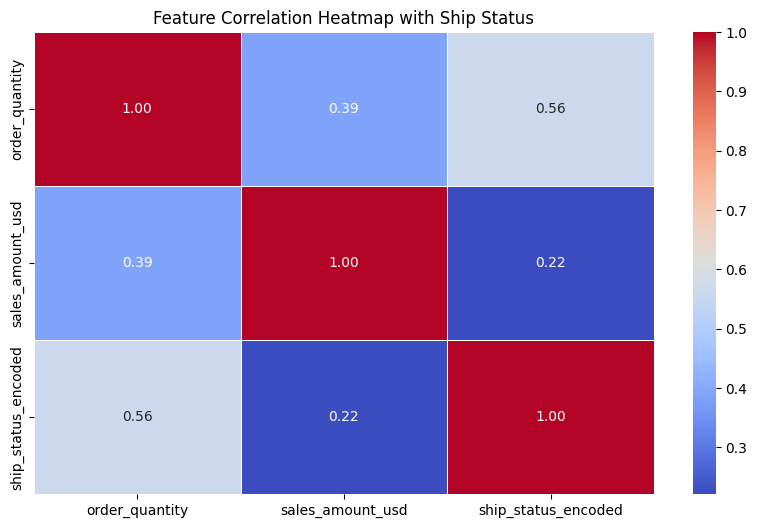

In [ ]:
# Encode 'ship_status' if it exists in the dataframe
if "ship_status" in df.columns:
    df["ship_status_encoded"] = LabelEncoder().fit_transform(df["ship_status"])

# Select only numerical features (integer and float columns)
numeric_features = df.select_dtypes(include=["int64", "float64"]).copy()

# Compute the correlation matrix for all numerical features
correlation_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap with Ship Status")

# Show the plot
plt.show()

## Using Cramér's V to measure the association between categorical features and the target label

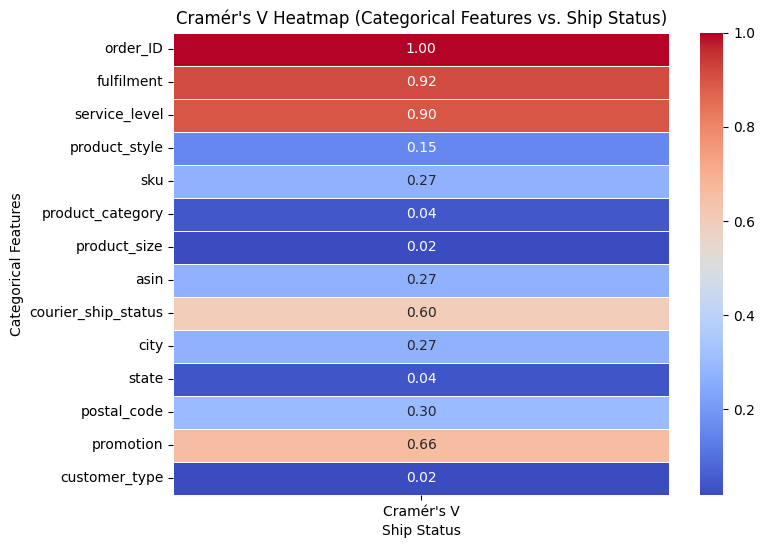

In [ ]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical associations."""
    chi2 = chi2_contingency(confusion_matrix)[0] # Compute Chi-Square statistic
    n = confusion_matrix.sum().sum() # Total sample size
    k = min(confusion_matrix.shape) - 1 # Degrees of freedom correction
    return np.sqrt(chi2 / (n * k)) # Compute Cramér's V


# Identify categorical features (excluding "ship_status")
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
categorical_features.remove("ship_status") # Ensure target variable is not included


# Compute Cramér's V for each categorical feature vs. "ship_status"
cramers_v_matrix = {}
for feature in categorical_features:
    confusion_matrix = pd.crosstab(df[feature], df["ship_status"]) # Cross-tabulation
    cramers_v_matrix[feature] = cramers_v(confusion_matrix) # Compute Cramér's V


# Convert results into a DataFrame
cramers_v_df = pd.DataFrame.from_dict(cramers_v_matrix, orient="index", columns=["Cramér's V"])


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title("Cramér's V Heatmap (Categorical Features vs. Ship Status)")
plt.xlabel("Ship Status")
plt.ylabel("Categorical Features")

# Show the plot
plt.show()

Cramer's v = sqrt( χ² / (N * (k - 1)) )

- χ² = Chi-Square statistic
- N = Total number of observations
- k = Minimum of (number of rows, number of columns)

if Cramer's v = 0 then there is no association between the given feature and the label

else 0 < v < 0.1 then there is a weak associtaion between the given feature and the label

else 0.1 < v < 0.3 then there is a moderate associtaion between the given feature and the label

else 0.3 < v < 0.5 then there is a strong associtaion between the given feature and the label

else 0.3 < v < 0.5 then there is a very strong associtaion between the given feature and the label

## Extracting features with the highest correlation and encoding categorical values

In [ ]:
# Select Relevant Features for Analysis
selected_features = ["order_quantity", "fulfilment", "service_level", "courier_ship_status", "promotion", "ship_status"]
df_selected = df[selected_features].copy() # Create a copy to avoid modifying the original dataframe

# Identify Categorical Features for Encoding
categorical_features = ["fulfilment", "service_level", "courier_ship_status", "promotion"]
label_encoders = {}

# Apply Label Encoding to Categorical Features
for feature in categorical_features:
    if feature in df_selected.columns:
        label_encoders[feature] = LabelEncoder() # Initialize LabelEncoder
        df_selected[feature] = label_encoders[feature].fit_transform(df_selected[feature]) # Encode categories as integers


# Encode Target Variable ('ship_status')
column_to_encode = "ship_status"
label_encoder = LabelEncoder()
df_selected[column_to_encode] = label_encoder.fit_transform(df_selected[column_to_encode])

# Save Processed Data to CSV File
processed_file_path = "/content/AmazonDataset_StrongFeatures.csv"
df_selected.to_csv(processed_file_path, index=False)

# Print Confirmation and Display First Few Rows
print(f"Processed dataset saved at: {processed_file_path}\n")
df_selected.head()

Processed dataset saved at: /content/AmazonDataset_StrongFeatures.csv



,order_quantity,fulfilment,service_level,courier_ship_status,promotion,ship_status
0,0,1,1,2,5777,0
1,1,1,1,1,2051,5
2,1,0,0,1,5766,3
3,0,1,1,2,5777,0
4,1,0,0,1,5777,3


## Model Training

we will use Random Forest as our machine learning model as it can handle both categorical and numerical data and we can reduce the overfitting by averaging multiple decistion trees

In [ ]:
# Load Processed Dataset
file_path = "/content/AmazonDataset_StrongFeatures.csv"
df = pd.read_csv(file_path)

# Split Features (X) and Target Variable (y)
X = df.drop(columns=['ship_status']) # Features (independent variables)
y = df['ship_status'] # Target variable (dependent variable)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100 trees in the forest
rf_model.fit(X_train, y_train) # Train the model using training data

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred) # Compute accuracy
report = classification_report(y_test, y_pred) # Generate classification report

# Print Results
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Random Forest Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3676
           1       0.73      0.54      0.62       136
           2       0.54      0.64      0.58        55
           3       1.00      1.00      1.00     15527
           4       0.00      0.00      0.00         1
           5       0.92      0.98      0.95      5760
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.77      0.77      0.77       193
           9       0.00      0.00      0.00         2
          10       0.21      0.02      0.04       417
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00         2

    accuracy                           0.97     25794
   macro avg       0.40      0.38      0.38     25794
weighted avg       0.96      0.97      0.97     25794



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
